# HW1: Practice with Python, hard-margin SVM, and linear regression

## Ramona Liu NetID: kliu268

Hello Students:

- Start by downloading HW1.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- I've included the output from my solution in HW1.html so you can check your
  work. Your output should match or be close to mine. Use 3 significant
  figures for floats. e.g. We can print 3 figures for 𝜋/1000 as
  print(f'{np.pi/1000:.3}'). The pattern is print(f'{x:.precision}'),
  where x is the value to print and precision is the number of figures.
- If you have questions, please ask them in class, office hours, or piazza. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- Please clean up your code:
  - Comment out unnecessary code that is useful for orienting you, like printing the data set.
  - Label your output, like writing 'weight=20.1' or 'The weight is 20.1' rather than just '20.1'.
  - Simplify your code if you can.
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW01.ipynb to Canvas's HW01.ipynb assignment
  - HW01.html to Canvas's HW01.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2a, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, linear_model

# 1. Use a hard-margin SVM
 to classify cars as having automatic or manual transmissions.
- Read [http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv](http://www.stat.wisc.edu/~jgillett/451/01/mtcars30.csv) into a DataFrame. (This is the mtcars data frame from R with two of its rows removed to get linearly separable data.)
- Make a 30x2 numpy array X from the mpg (miles per gallon) and wt (weight in 1000s of pounds) columns. Make an array y from the am column (where 0=automatic
  or 1=manual transmission).
- Train an SVM using kernel='linear' and C=1000. Print its coefficients and intercept.
- Report the training accuracy. (It's given by clf.score(X, y).)
- Predict the transmission for a car weighing 4000 pounds (wt=4) that gets 20 mpg.
- Use five plt.plot() calls to make a figure with wt on its x-axis and mpg on its y-axis including:
  - the automatic transmission cars in red
  - the manual transmission cars in blue
  - the decision boundary (the center line of the road)
  - the lower margin boundary (the left side of the road)
  - the upper margin boundary (the right side of the road)
  - a reasonable title, axis labels, and legend

In [2]:
cars = pd.read_csv("mtcars30.csv")
X = np.array(cars[['mpg','wt']])
y = np.array(cars[['am']]).ravel()
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)
print(f'clf.coef_={clf.coef_}')
print(f'clf.intercept_={clf.intercept_}')
#Report the training accuracy. 
clf.score(X, y)
# Predict the transmission for a car weighing 4000 pounds (wt=4) that gets 20 mpg
sample = np.array([[20, 4]])
clf.predict(sample)

clf.coef_=[[-0.30922192 -8.24431115]]
clf.intercept_=[32.01974189]


array([0])

Thus, we predict that it is an automatic transmission car.

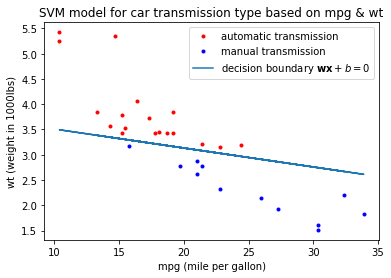

In [3]:
plt.plot(X[y == 0, 0], X[y == 0, 1], '.', color='red', label='automatic transmission')
plt.plot(X[y == 1, 0], X[y == 1, 1], '.', color='blue', label='manual transmission')
x1 = X[:, 0]
x2 = -(clf.coef_[0][0] * x1 + clf.intercept_) / clf.coef_[0][1]
plt.plot(x1, x2, label=r'decision boundary $\mathbf{wx} + b = 0$')
plt.xlabel('mpg (mile per gallon)')
plt.ylabel('wt (weight in 1000lbs)')
plt.legend()
plt.title('SVM model for car transmission type based on mpg & wt')
plt.show(block=False)

# 2. Make three linear regression models.


## 2a: Make a simple regression model by hand.
Use the matrix formula $w = (X^T X)^{-1} X^T y$ we developed in class to fit these three points:
(0, 5), (2, 1), (4, 3). (Use linear_model.linearRegression(), if you wish, to check your work.)

$x$ = $\begin{bmatrix} 1 & 0 \\ 1 & 2 \\ 1 & 4 \end{bmatrix}$
$x^T$ = $\begin{bmatrix} 1 & 1 & 1 \\ 0 & 2 & 4 \end{bmatrix}$
$y$ = $\begin{bmatrix} 5 \\ 1 \\ 3 \end{bmatrix}$\
$x^T$*$x$ = $\begin{bmatrix}  3 & 6 \\ 6 & 20 \end{bmatrix}$
$x^T$*$y$ = $\begin{bmatrix}  9 \\ 14 \end{bmatrix}$\
($x^T$*$x$)^$(-1)$ = $\begin{bmatrix} 5/6 & -1/4 \\ -1/4 & 1/8 \end{bmatrix}$\
($x^T$*$x$)^$(-1)$*$x^T$*$y$ = $\begin{bmatrix}  4 \\ -1/2 \end{bmatrix}$\
Thus, $ y = (-1/2)x+4 $

## 2b: Make a simple linear regression model from real data.
Estimate the average daily trading volume of a Dow Jones Industrial Average stock from its market capitalization. That is, use $y = $ AvgVol vs. $x =$ MarketCap.
- Read [http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv](http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv) into a DataFrame.
- Find the model. Print its equation.
- Print its $R^2$ value (the proportion of variability in $y$ accounted for by $x$ via the linear model, given by model.score(X, y)).
- Make a plot of the data and model line.
- Use the model to predict the volume for a company with market capitalization of 0.25e12 (a quarter-trillion dollars); add this as a red point on your plot.
- Say what happens to Volume as Market Capitalization increases. (Use a Markdown cell.)

intercept=3408894.8726414144, slope=2.6758424874802994e-05, R^2 = 0.704564022997879


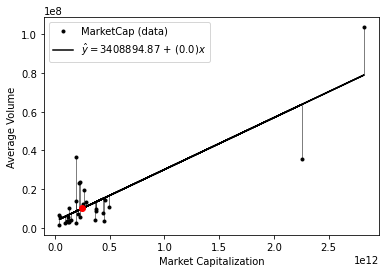

In [4]:
df = pd.read_csv("http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv")
x = df['MarketCap'].to_numpy() # we need vector for plotting
X = x.copy()
nrows = X.shape[0]
X.shape = (nrows, 1) # we need array for model.fit()
y = df['AvgVol'].to_numpy()
model = linear_model.LinearRegression()
model.fit(X, y)
b = model.intercept_
w = model.coef_[0]
score = model.score(X, y)
print(f'intercept={b}, slope={w}, R^2 = {score}')
y_hat = model.predict(X)
plt.plot(x, y, '.', color='black', label='MarketCap (data)')
plt.xlabel('Market Capitalization')
plt.ylabel('Average Volume')
plt.plot(x, y_hat, color='black',
         label=f'$\\hat{{y}}=${round(b, 2)} + ({round(w, 2)})$x$')
plt.plot([x, x], [y, y_hat], # [x1, x2], [y1, y2]
         color='black', linewidth=.5, label=None)
predicted_value=model.predict(np.array([[0.25e12]]))
plt.plot([0.25e12], [predicted_value], marker='o', color="red")
#plt.plot(x, y_hat, '.', color='red', label='fitted values') #the red dots 
plt.legend()
plt.show(block=False)

## 2c Make a multiple regression model.
Estimate the same volume from both market capitalization and price. That is, use $y =$ AvgVol vs. $x_1 =$ MarketCap and $x_2 =$ Price.
- Find the model.
- Print its equation.
- Print its $R^2$ value.
- Say what happens to Volume as Market Capitalization increases and what happens to Volume as Price increases. (Use a Markdown cell.)

In [5]:
X = df[['MarketCap', 'Price']].to_numpy()
y = df['AvgVol'].to_numpy()
model.fit(X, y)
print(f'AvgVol = {model.intercept_:.3} + ({model.coef_[0]:.3})MarketCap + ({model.coef_[1]:.3})Price')
print(f'R^2 is {model.score(X, y):.3}') # coefficient of determination

AvgVol = 1.44e+07 + (2.89e-05)MarketCap + (-6.69e+04)Price
R^2 is 0.823


While keeping price constant, the average volume increases 2.89e-05 as Market Capitalization increases one unit.\
While keeping Market Capitalization constant, the average volume decreases -6.69e+04 as price increases one unit.